# Week 6 - Intro to Machine Learning & Linear Regression

#### Author: *Rohan Chopra*

Parts of this notebook have been adapted from Prof. Fraida Fund's Intro to ML notes.


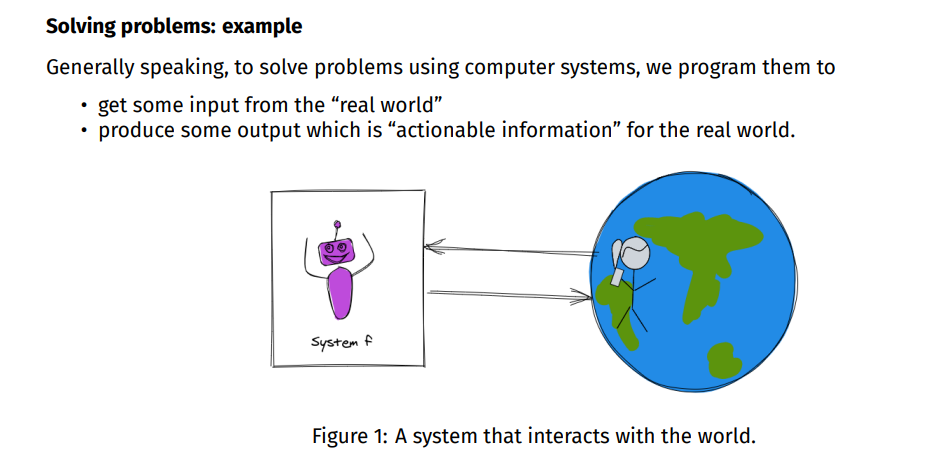

## Solving problems: example (2)

Suppose we want a system to help students decide whether to enroll in this course or not.

• Input: grades on previous coursework

• Actionable info: predicted DS course grade



Let
• 𝑥1= grade on previous probability coursework

• 𝑥2= grade on previous linear algebra coursework

• 𝑥3= grade on previous programming coursework
and

𝑦 is predicted DS course grade.

The “hat” indicates that this is an estimated value.

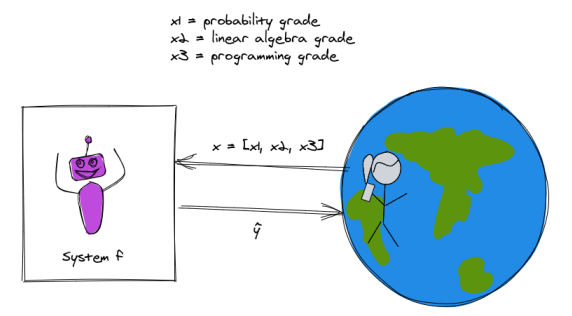

Let us suppose we calculate the grade this way :    
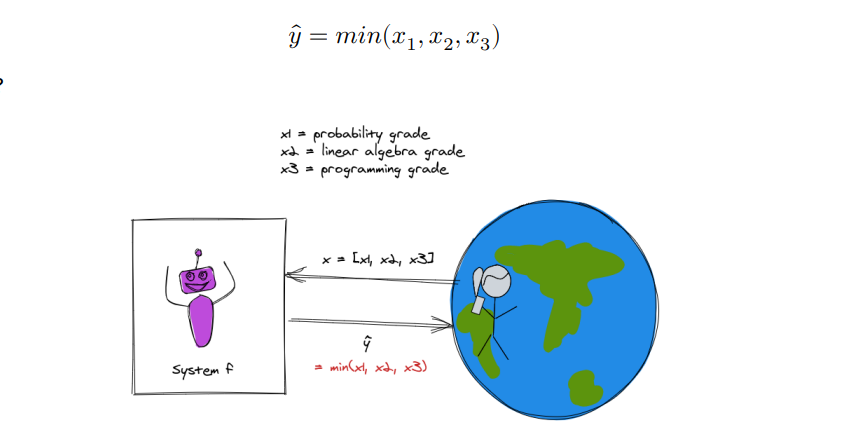

## Suppose we predict your grade as

$$
\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 \quad \text{where} \quad w_1 = \frac{1}{4}, \quad w_2 = \frac{1}{4}, \quad w_3 = \frac{1}{2}.
$$

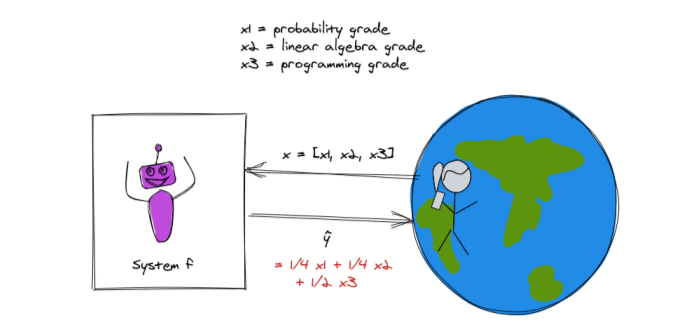

### Rule-based problem solving
1. Develop an algorithm that will produce the desired result for a given input.
2. Implement the algorithm.
3. Feed input to the implemented algorithm, which outputs a result.

### Vs


### Problem solving with machine learning
1. Collect and prepare data.
2. Build and train a model using the prepared data.
3. Use the model on new inputs to produce a result as output.
(“Rules” are inferred automatically from data!

### What are some benefits of predicting course grade using the data-driven approach?

• if the “rules” are complicated, may be difficult/error-prone to encode them as a computer program.

• it’s easy to update with more experience or if the “world” changes.

For example:

– if over time the quality of admitted students goes up and I give higher grades, the system that
predicts the mean of last semester’s scores will “track” with that.


– if I didn’t have many students with poor programming background the first semester, but I do
the second semester, I will be able to predict their performance better next time.

## What problems are “good” for ML, overall?

### Problems that may not be well suited to ML


• There is an accurate and simple algorithm that will produce the desired output.

• There is no “good” data available to train the model.

• The model can be “tricked”, with potentially severe consequences.

• Need to audit or explain the output.

• Expects human empathy, expert creativity.

### Problems that are often good candidates for ML
• There is “good” data available to train the model

• The thing we want to predict is measurable and observable

• Human expertise does not exist or is insufficient

• Humans cannot easily explain their expertise

• We will get more data during operation + can improve with experience

## Machine Learning Paradigms:


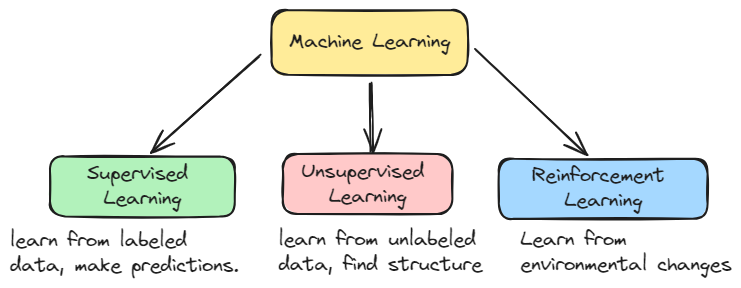


### Regression vs. Classification:

Regression tasks involve predicting continuous numerical values.
Classification tasks involve predicting discrete class labels.

### Evaluation Metrics:

Different metrics are used to evaluate the performance of ML models, such as accuracy, precision, recall, F1-score for classification tasks.

Mean Squared Error (MSE), R-squared (R²), Root Mean Squared Error (RMSE) for regression tasks.

## Simple Linear Regression

Definition:
Linear Regression is a supervised learning algorithm used to model the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a linear equation to observed data.

Mathematical Representation:

For a simple linear regression with one independent variable:
$$ y=mx+b $$
Where:

*    y is the dependent variable (target),

*    x is the independent variable (feature),

*    m is the slope (coefficient) of the line,

*    b is the y-intercept (constant term).

## The basic supervised learning problem :    
Given a sample with a vector of features
$$
𝐱 = (𝑥1, 𝑥2, ...)
$$

There is some (unknown) relationship between 𝐱 and a target variable, 𝑦, whose value is unknown.

We want to find , our ̂𝑦 prediction for the value of 𝑦.

### A supervised machine learning “recipe”
• Step 1: Get (good) data in some usable representation.
For supervised learning, we need labeled examples:$$ (𝐱𝐢, 𝑦𝑖), 𝑖 = 1, 2, ⋯ ,𝑁.$$

• Step 2: Choose a candidate model $$ \hat{y} = f(x) $$

• Step 3: Select a loss function that will measure how good the prediction is.

• Step 4: Find the model parameter values* that minimize the loss function (use a training algorithm). *If your model has parameters.

• Step 5: Use trained model to predict  $\hat{𝑦}$ for new samples not used in training (inference).

• Step 6: Evaluate how well your model generalizes to this new, unseen data

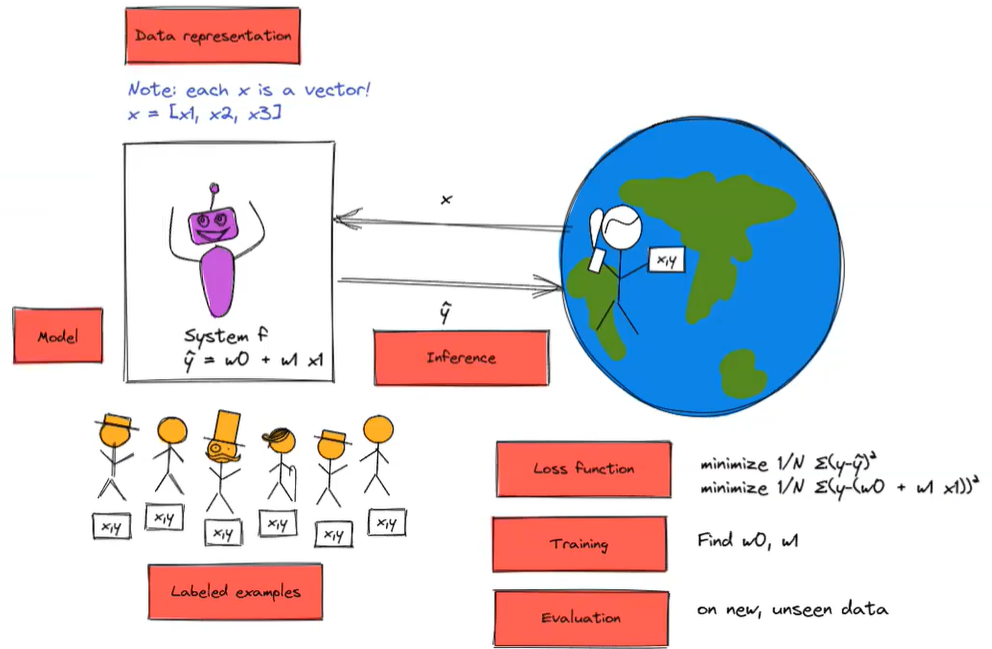

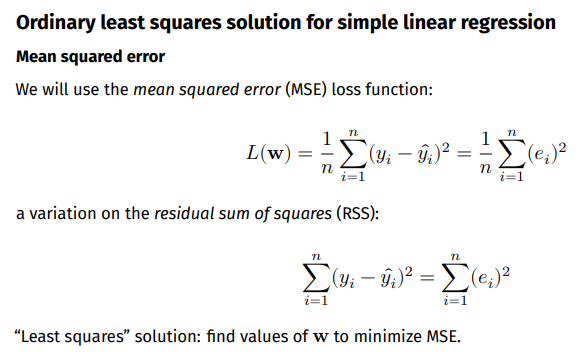

The $w0$ and $w1$ values are called the **model coefficients/ parameters**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

### Eg. Predict current grade of student based on past grades in a subject

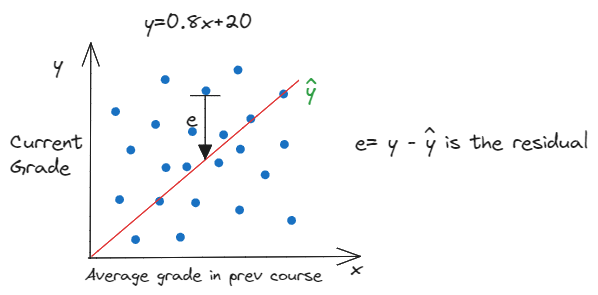

To some extent, a student’s average grades on previous coursework “explains” their grade in DS.

• The predicted value for each student, $\hat{y}$ is along the diagonal line.

Draw a vertical line from each student’s point (𝑦) to the corresponding point on the line ($\hat{y}$). This is the residual  e = 𝑦 −$\hat{y}$.

• Some students fall right on the line - these are examples that are explained “well” by the model.Some students are far from the line.

• The difference between the “true” value 𝑦 and the predicted value $\hat{y}$ may be due to all kinds of differences between the “well-explained example” and the “not-well-explained-example” - not everything about DS course grade can be explained by performance in previous coursework!
This is what the residual captures.


## Multiple Linear Regression

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).
- $\epsilon$ is the _error_ term

A practical example of this applied to BikeShare data might be:

$total\_rides = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. Note that because the $\beta$ values are constants, they will not be independent variables in the final model, as seen above.

---




## Case : Build a model to predict the monthly salary of candidates

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

C:\Users\shrey\AppData\Local\Temp\ipykernel_7728\391924344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [3]:
# Dataset is already loaded below
data = pd.read_csv("employee.csv")

In [4]:
# Dimensions of training data
data.shape

(4277, 13)

In [5]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [6]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [7]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [8]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [9]:
#Handling null values in categorical columns
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


### Data Visualization :

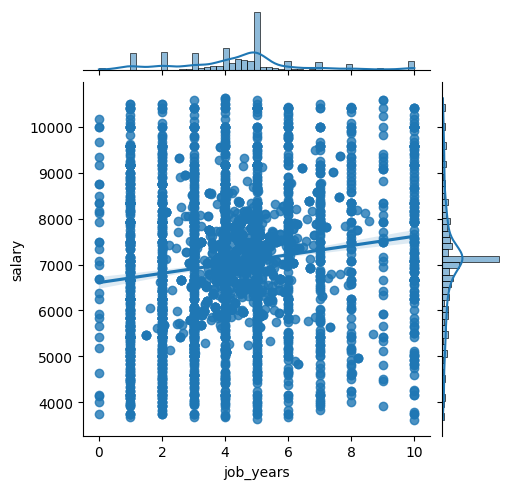

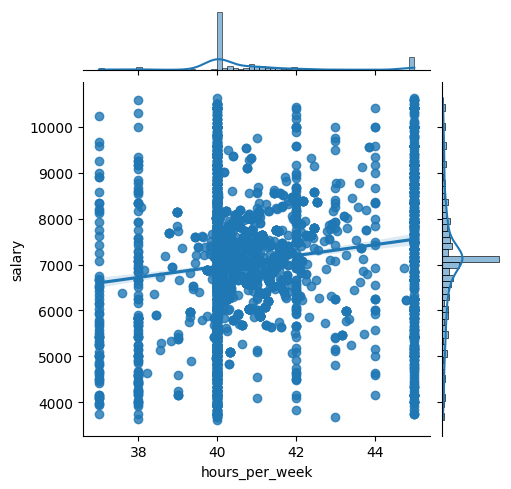

In [11]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary)

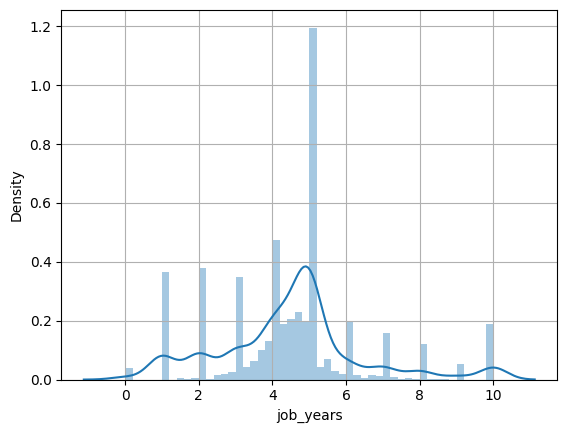

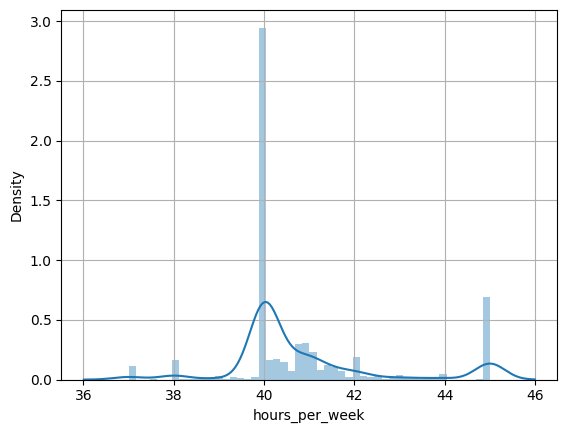

In [12]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimodal distribution ( 2 peaks) showing that most people work from 40 to 45 hours per week.

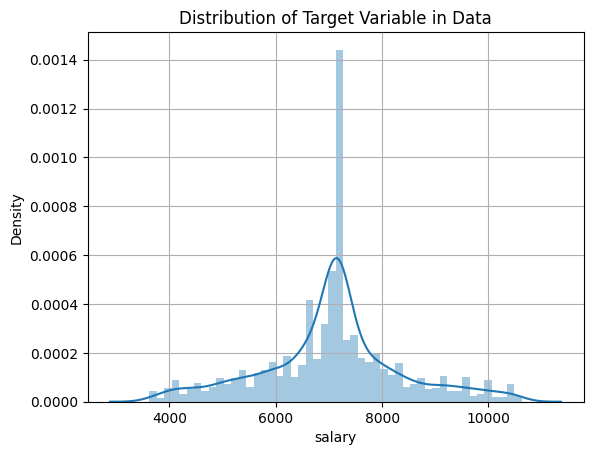

max: 10625.0
min: 3622.0


In [13]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [14]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [15]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [16]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [17]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [18]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [19]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Train Test Split

In [20]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Pre-processing data

### Standardization (Z-score normalization):

$$ x_{\text{std}} = \frac{x - \mu}{\sigma} $$

- **Purpose:** Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
- **Properties:**
  - Centers the data around 0.
  - Rescales the data to have unit variance.
  - Does not bound the data within a specific range.
  - Preserves the shape of the distribution.
- **Use Cases:**
  - Algorithms that assume zero-centered data or require features to have a similar scale (e.g., gradient descent-based algorithms, support vector machines).
  - When the distribution of the features is Gaussian-like.

### Normalization (Min-Max scaling):

 $$ x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)} $$

- **Purpose:** Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1].
- **Properties:**
  - Scales the data to a specified range.
  - Shifts the data to start at 0.
  - Does not affect the shape of the distribution.
  - Preserves the relative relationships between data points.
- **Use Cases:**
  - Neural networks, especially those with activation functions sensitive to input magnitudes (e.g., sigmoid or tanh functions).
  - When the distribution of the features is unknown or non-Gaussian.

**Choosing Between Standardization and Normalization:**
- Use standardization when the distribution of your features is approximately Gaussian-like and you want to center the data and rescale it to have unit variance.
- Use normalization when the scale of your features is important, or when you need to bound the features within a specific range.
- It's often beneficial to try both preprocessing techniques and evaluate their effects on model performance to determine which one works best for your specific dataset and model.


In [21]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [22]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [ ]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
4,-0.749465,0,-0.490850,0.588356,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2100,0.255173,0,-0.490850,-0.625763,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4052,0.054246,1,-0.298053,2.409535,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1789,0.896145,0,1.172465,0.588356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3867,0.255173,1,-0.490850,0.588356,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,0.255173,1,-0.490850,-0.625763,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3237,0.255173,0,-0.490850,-0.625763,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1177,0.258187,1,-0.439361,1.195416,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2030,0.255173,0,-0.490850,-0.625763,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 1.91463366e+02,  7.04277004e+01,  1.99219864e+02,  2.22977146e+02,
        8.03384502e+01, -5.13666045e+01,  5.23747538e+01, -2.24747699e+03,
        1.02206117e+03,  7.80141888e+02,  4.51188081e+02,  4.98405598e+02,
        9.43104749e+02,  7.74360970e+02,  3.00769110e+01,  9.08762573e+02,
       -2.38742359e-12,  3.51740013e+03,  3.74558879e+02, -5.06327154e+01,
        2.26271164e+02,  2.20268780e+02, -2.75443694e+02, -1.95438703e+02])

In [ ]:
reg.intercept_

6186.240340256719

Just to recall

$\hat{y} = \alpha + \beta_1 * X_1 + \beta_2 * X_2 +...$

Our Final model is given by -

$\hat{y} = 6145.79 + 1.887 * X_1 + 7.22 * X_2 +...$


In [ ]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

210.76971315460784

In [ ]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [ ]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 12134.805941362452


* A lower MSE indicates that the model's predictions are closer to the actual values on average, while a higher MSE suggests larger errors between predictions and actual values.

❗Pre-processing on Test data not done. (That will be your homework for this week.)

### Applications of Linear Regression:


*    Predicting house prices based on features like area, number of bedrooms, etc.
*     Forecasting sales based on advertising expenditure.
* Predicting student's performance based on study hours, previous grades, etc.

### Limitations of Linear Regression:

* Assumes a linear relationship between variables.
* Sensitive to outliers.
* Cannot capture complex relationships between variables.

# Homework Assignment

In [30]:
# Apply the same standard scaler to test numeric data
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [31]:
# Predict on the scaled test data
y_pred = reg.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred) / np.mean(y_test)
print("Mean Squared Error (after preprocessing test data):", mse)

Mean Squared Error (after preprocessing test data): 202.17328580158636


Actual vs Predicted Salary Plot
To see how well the model predicted:

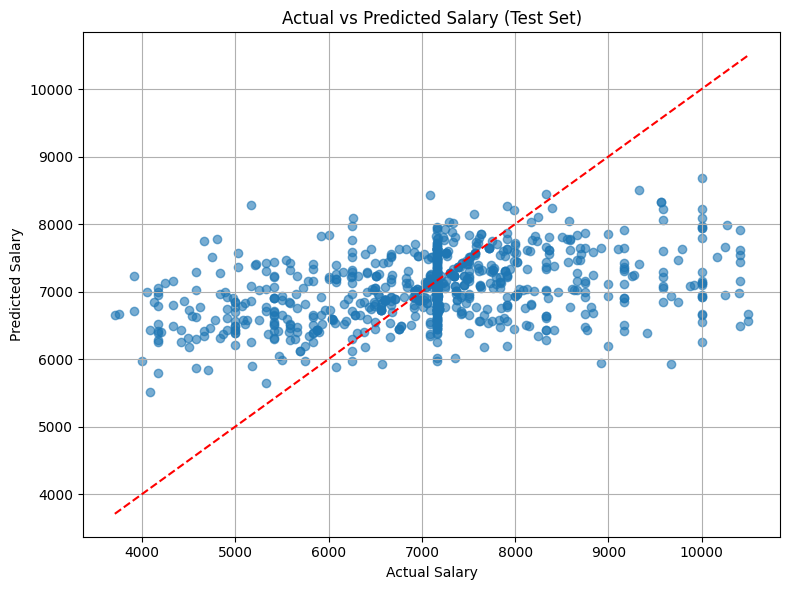

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.grid(True)
plt.tight_layout()
plt.show()
